# JBK: tower

Saang Bum Kim <br>
2020-07-01 17:50

In [ ]:
function [model,sb] = cfd_200915(varargin)
%
% [model,sb] = rib_200915(varargin)
%
% Model exported on Sep 16 2020, 18:03 by COMSOL 5.5.0.359.

In [1]:
% !comsol mphserver -silent &

[1] 21693



In [1]:
%
%%  PART 0.     Opening
%
% fclose all; close all
% clc
% clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/wtt/jbk/';

p_comsol = 2036;
seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*


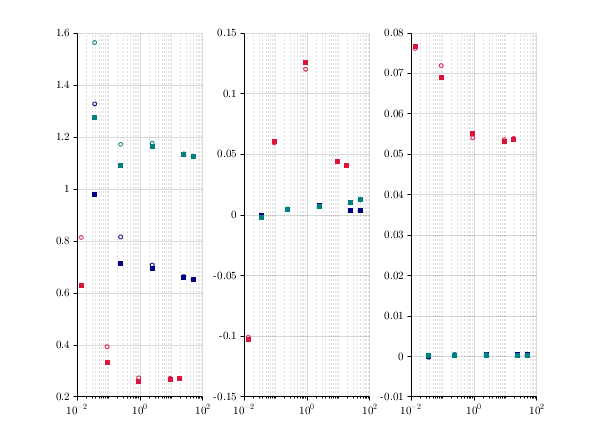

In [27]:
clear res
res.geo(1).s_geo = 'longitudinal';
res.geo(2).s_geo = 'transverse';
res.geo(3).s_geo = 'deck';

res.s_mk{1,1} = 'o';
res.s_mk{1,2} = 4;

res.s_mk{2,1} = 's';
res.s_mk{2,2} = 5;

res.s_c{1} = rgb('Navy');
res.s_c{2} = rgb('Teal');
res.s_c{3} = rgb('Crimson');

res.Re_pool = [150 1000 1e4 1e5 2e5];
res.Re_n = length(res.Re_pool);

id_pause = true;
figure(1)
clf

ll = 1;
for id_geo = 1:3
for ii = 1:res.Re_n
    res.geo(id_geo).sb(ll).Re(ii) = res.Re_pool(ii);
    switch id_geo
        case {1,2}
            load(sprintf('tower/tower_%s_turbulent_SST_Re%d', ...
                res.geo(id_geo).s_geo, res.geo(id_geo).sb(ll).Re(ii)));
        case 3
            load(sprintf('deck/deck_%s_a000_turbulent_SST_Re%d', ...
                'upper', res.geo(id_geo).sb(ll).Re(ii)));
        % otherwise
    end

% if ii == 1
    res.geo(id_geo).sb(ll).BD = [sb.B,sb.D];
    res.geo(id_geo).sb(ll).BD_F = [sb.B,sb.D]*sb.scale;
% end

    switch id_geo
        case {1,3}
            sc = [1 sb.D/sb.B (sb.D/sb.B)^2];
        case 2
            sc = [sb.D/sb.B 1 1];
        % otherwise
    end
    sc = sb.D/sb.B*[1 1 sb.D/sb.B];
res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6)*diag([sc sc]);

    for jj=1:3
        subplot(1,3,jj)
        semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj), ...
            'o', 'Color',res.s_c{id_geo}, 'MarkerSize', 6-3)
            % 'Color',rgb('Navy'), 'MarkerSize', res.geo(id_geo).sb(.s_mk{2})
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
    for jj=1:3
        subplot(1,3,jj)
        h = semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj+3), ...
            's', 'Color',res.s_c{id_geo}, 'MarkerSize', 6-2);
        h.MarkerFaceColor = h.Color;
    end
end
end

In [28]:
res.geo(1).sb.res
res.geo(2).sb.res
res.geo(3).sb.res


ans =

    1.3275   -0.0003   -0.0002    0.9798   -0.0006   -0.0001
    0.8156    0.0047    0.0005    0.7144    0.0046    0.0004
    0.7078    0.0075    0.0006    0.6936    0.0075    0.0005
    0.6630    0.0039    0.0004    0.6611    0.0038    0.0004
    0.6527    0.0034    0.0006    0.6511    0.0034    0.0006


ans =

    1.5633   -0.0020    0.0002    1.2740   -0.0020    0.0002
    1.1717    0.0049    0.0006    1.0900    0.0048    0.0003
    1.1760    0.0068    0.0005    1.1647    0.0068    0.0004
    1.1352    0.0100    0.0003    1.1325    0.0100    0.0002
    1.1265    0.0124    0.0003    1.1243    0.0124    0.0003


ans =

    0.8137   -0.1007    0.0762    0.6275   -0.1024    0.0768
    0.3933    0.0594    0.0719    0.3343    0.0604    0.0690
    0.2736    0.1202    0.0541    0.2600    0.1258    0.0552
    0.2719    0.0443    0.0536    0.2684    0.0438    0.0533
    0.2720    0.0411    0.0540    0.2697    0.0405    0.0537



In [24]:
res.geo(1).sb.BD_F
res.geo(2).sb.BD_F
res.geo(3).sb.BD_F


ans =

    6.0000    4.5000


ans =

    6.0000    4.5000


ans =

   16.1000    3.6507



# Tower

- corner
    - r/b = 0.01 / [0.045 0.06] = 0.2222 0.1667
    - 0.5 0.6
- d/b = 6/4.5 = 1.333
    - EN: 1.9 *4.5/6/2 = 0.7125
    - C: 0.6511
- d/b = 4.5/6 = 0.75
    - EN: 2.3/2 = 1.15
    - C: 1.1243

# FINE